# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.165061e+01     1.454986e+01
 * time: 0.0032820701599121094
     1     6.188261e+01     8.933254e+00
 * time: 0.009470224380493164
     2     5.625727e+01     1.134221e+01
 * time: 0.023131132125854492
     3     4.029777e+01     8.222803e+00
 * time: 0.04134702682495117
     4     2.991768e+01     7.455590e+00
 * time: 0.05993318557739258
     5     2.351444e+01     5.987388e+00
 * time: 0.07582211494445801
     6     1.133887e+01     2.347559e+00
 * time: 0.14693903923034668
     7     8.816621e+00     2.754364e+00
 * time: 0.16042399406433105
     8     7.183060e+00     1.773209e+00
 * time: 0.17357611656188965
     9     7.071811e+00     3.363509e+00
 * time: 0.1842350959777832
    10     6.737302e+00     2.072574e+00
 * time: 0.19728708267211914
    11     6.427606e+00     2.129295e+00
 * time: 0.210557222366333
    12     6.187122e+00     2.460663e+00
 * time: 0.22156000137329102
    13     5.977286e+00     1.361506e+00
 * time

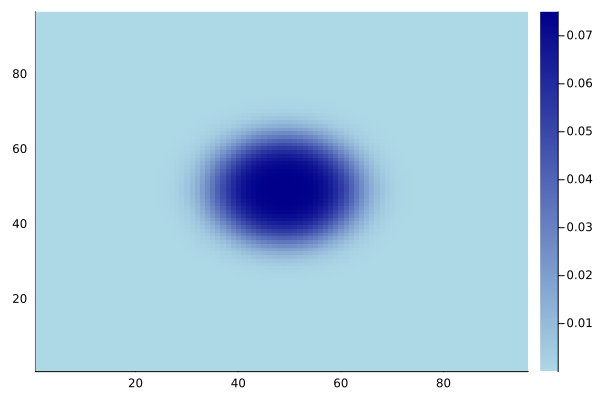

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)